## 네이버에서 kospi200지수 수집하기 링크:http://finance.naver.com/sise/sise_index.nhn?code=KPI200 (pg.99~118)

In [33]:
#https://finance.naver.com/sise/sise_index_day.naver?code=KPI200: 네이버 일별시세의 주소창
#https://finance.naver.com/sise/sise_index_day.naver?code=KPI200&page=744: 일별시세의 주소창에서 가장 끝 페이지 (2024-01-20일 기준)
index_cd='KPI200'
page_n=1
naver_index='https://finance.naver.com/sise/sise_index_day.naver?code='+index_cd+'&page='+str(page_n)

In [34]:
from urllib.request import urlopen
source=urlopen(naver_index).read()
source

b'<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>\xb3\xd7\xc0\xcc\xb9\xf6\xc6\xe4\xc0\xcc \xc1\xf5\xb1\xc7</title>\n\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240124162200/css/newstock.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240124162200/css/common.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240124162200/css/layout.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240124162200/css/main.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240124162200/css/newstock2.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240124162200/css/newstock3.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/202401

In [35]:
import bs4
source=bs4.BeautifulSoup(source,'lxml')

In [36]:
print(source.prettify())

<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   네이버페이 증권
  </title>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20240124162200/css/newstock.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20240124162200/css/common.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20240124162200/css/layout.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20240124162200/css/main.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20240124162200/css/newstock2.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20240124162200/css/newstock3.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20240124162200/css/world.css" rel="stylesheet" type="text/css"/>
 </he

In [37]:
td = source.find_all('td')
len(td)

54

In [38]:
#/html/body/div/table[1]/tbody/tr[3]/td[1]: 복사한 XPath
source.find_all('table')[0].find_all('tr')[2].find_all('td')[0] #파이썬은 숫자를 0부터 세기 때문에 XPath 수에서 -1을 해줘야 한다.

<td class="date">2024.01.30</td>

In [39]:
d=source.find_all('td',class_='date')[0].text
d

'2024.01.30'

In [40]:
#날짜 인식하기 위한 datetime 라이브러리
import datetime as dt

In [41]:
yyyy=int(d.split('.')[0]) #문자열.split(구분자)로 문자열을 년, 월, 일로 나눈다.
mm=int(d.split('.')[1])
dd=int(d.split('.')[2])
this_date=dt.date(yyyy,mm,dd)
this_date

datetime.date(2024, 1, 30)

In [42]:
#날짜 형식으로 바꾸는 함수 정의
def date_format(d):
    d=str(d).replace('-','.') #날짜 구분자가 .이 아닌 -으로 되어 있는 경우, .으로 변환해주는 기능을 한다.
    yyyy=int(d.split('.')[0])
    mm=int(d.split('.')[1])
    dd=int(d.split('.')[2])
    
    this_date=dt.date(yyyy,mm,dd)
    return this_date

In [43]:
#종가지수를 가져오는 방법 pg.110 XPath: /html/body/div/table[1]/tbody/tr[3]/td[2]
this_close=source.find_all('tr')[2].find_all('td')[1].text
this_close=this_close.replace(',','')
this_close=float(this_close)
this_close

337.83

In [44]:
p = source.find_all('td',class_='number_1')[0].text
p

'337.83'

In [45]:
dates = source.find_all('td',class_='date')
prices = source.find_all('td',class_='number_1')

In [46]:
len(dates)

6

In [47]:
len(prices) #td class_="number_1" 코드가 4개가 있다. 

24

In [48]:
for n in range(len(dates)): #dates 개수만큼 반복
    this_date=dates[n].text #n번째 dates 값 추출
    this_date=date_format(this_date) #날짜 형식으로 변환
    
    this_close=prices[n*4].text #0,4,8,....등 4의 배수에 해당하는 종가지수 추출
    this_close=this_close.replace(',',' ') # 쉼표(,)제거
    this_close=float(this_close) #숫자 형식으로 변환
    this_close
    print(this_date, this_close) #결과값 추출

2024-01-30 337.83
2024-01-29 337.84
2024-01-26 334.21
2024-01-25 333.8
2024-01-24 333.27
2024-01-23 334.97


In [49]:
# 마지막 페이지 주소 Xpath: /html/body/div/table[2]/tbody/tr/td[12]/a
paging = source.find('td',class_='pgRR').find('a')['href']
paging

'/sise/sise_index_day.naver?code=KPI200&page=745'

In [50]:
paging = paging.split('&')[1]
paging 

'page=745'

In [51]:
paging = paging.split('=')[1]
paging

'745'

In [52]:
#페이지 번호 int변수로 처리하기
last_page=source.find('td',class_='pgRR').find('a')['href']
last_page = last_page.split('&')[1]
last_page = last_page.split('=')[1]
last_page = int(last_page)

In [53]:
last_page

745

In [54]:
#데이터 추출 기능을 함수로 만들기
def historical_index_naver(index_cd, start_date='',end_date='', page_n=1, last_page=0):
    
    #start_date 설정
    if start_date: #start_date가 있으면
        start_date = date_format(start_date)
    else: #start_date가 없으면
        start_date = dt.date.today()
    
    #end_date 설정
    if end_date:
        end_date = date_format(end_date)
    else:
        end_date=dt.date.today()
        
        
    naver_index = 'http://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd +'&page=' + str(page_n)
    
    source = urlopen(naver_index).read() #지정한 페이지에서 코드 읽기
    source = bs4.BeautifulSoup(source, 'lxml') #뷰티플 수프로 태그별로 코드 분류
    
    dates = source.find_all('td',class_='date') # <td class="date">태그에서 날짜 수집
    prices = source.find_all('td', class_='number_1') # <td class="number_1"> 태그에서 지수 수집 
    
    for n in range(len(dates)):
        
        if dates[n].text.split('.')[0].isdigit():
            
            #날짜 처리 
            this_date = dates[n].text
            this_date = date_format(this_date)
            
            if this_date <= end_date and this_date >= start_date:
            #start_date와 end_date 사이에서 데이터 저장
                #종가 처리 
                this_close = prices[n*4].text #prices 중 종기지수인 0,4,8....번째 데이터 추출
                this_close = this_close.replace(',','')
                this_close = float(this_close)
                
                #딕셔너리에 저장
                historical_prices[this_date]= this_close
                
            elif this_date < start_date:
            # start_date 이전이면 함수 종료
                return historical_prices
            
    #페이지 내비게이션
    if last_page == 0: 
        last_page=source.find('td',class_='pgRR').find('a')['href'] #마지막 페이지 주소 추출
        last_page = last_page.split('&')[1] #& 뒤의 page=744 부분추출
        last_page = last_page.split('=')[1] #'=' 뒤의 페이지 번호만 추출
        last_page = int(last_page) #숫자형 변수로 전환
            
    #다음 페이지 호출 
    if page_n < last_page:
        page_n = page_n + 1
        historical_index_naver(index_cd,start_date,end_date,page_n, last_page)
        
        return historical_prices
    

In [55]:
index_cd='KPI200'
historical_prices = dict()
historical_index_naver(index_cd,'2018-4-1','2018-4-4')
historical_prices

{datetime.date(2018, 4, 4): 308.54,
 datetime.date(2018, 4, 3): 313.38,
 datetime.date(2018, 4, 2): 314.0}

## 네이버에서 해외 지수 수집하기(JSON 파일 크롤링 pg.119~)

In [2]:
#해외지수를 json 형태로 크롤링하는 단계 S&P500 url:https://finance.naver.com/world/worldDayListJson.naver?symbol=SPI@SPX&fdtc=0&page=3
import pandas as pd
import requests, json   # 해외지수는 json 형태로 표출됨
headers = {
    'User-Agent': 'Mozilla/5.0',
    'X-Requested-With': 'XMLHttpRequest',
}

In [3]:
symbol = 'SPI@SPX'
page = 1
url= 'https://finance.naver.com/world/worldDayListJson.naver?symbol='+symbol+'&fdtc=0&page='+str(page)
r = requests.post(url, headers=headers)
data = json.loads(r.text)

In [4]:
data[0]

{'symb': 'SPI@SPX',
 'xymd': '20240129',
 'open': 4892.95,
 'high': 4929.31,
 'low': 4887.4,
 'clos': 4927.93,
 'diff': 36.96,
 'rate': 0.76,
 'gvol': 2312494390}

In [5]:
data[0]['symb'] #종목 이름

'SPI@SPX'

In [6]:
data[0]['xymd'] #날짜 

'20240129'

In [7]:
data[0]['clos'] #종가

4927.93

In [8]:
#한 페이지에 있는 총 열흘 치 데이터 중 날짜와 종가만 뽑아서 딕셔너리에 저장
d = dict()
for n in range(len(data)):
    date=pd.to_datetime(data[n]['xymd']).date()
    price=float(data[n]['clos'])
    d[date] = price
print(d)

{datetime.date(2024, 1, 29): 4927.93, datetime.date(2024, 1, 26): 4890.97, datetime.date(2024, 1, 25): 4894.16, datetime.date(2024, 1, 24): 4868.55, datetime.date(2024, 1, 23): 4864.6, datetime.date(2024, 1, 22): 4850.43, datetime.date(2024, 1, 19): 4839.81, datetime.date(2024, 1, 18): 4780.94, datetime.date(2024, 1, 17): 4739.21, datetime.date(2024, 1, 16): 4765.98}


In [9]:
#지금까지 한 내용을 read_json함수로 만들기
def read_json(d, symbol, page=1):
    url = 'https://finance.naver.com/world/worldDayListJson.naver?symbol='+symbol+'&fdtc=0&page='+str(page)
    r = requests.post(url, headers=headers)
    data = json.loads(r.text)
    
    for n in range(len(data)):
        date = pd.to_datetime(data[n]['xymd']).date()
        price = float(data[n]['clos'])
        d[date] = price
        
    if len(data) >= 9 and page<3:
        page += 1
        read_json(d, symbol, page)
        
    return d

In [10]:
historical_index= pd.Series()
historical_index = read_json(historical_index, symbol, page)

/var/folders/7r/6vmcd3950rvf97kgvtk_twg40000gn/T/ipykernel_32757/4126586512.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  historical_index= pd.Series()


In [11]:
historical_index.head()

2024-01-29    4927.93
2024-01-26    4890.97
2024-01-25    4894.16
2024-01-24    4868.55
2024-01-23    4864.60
dtype: float64

In [12]:
indices = {
    'SPI@SPX' : 'S&P 500', 
    'NAS@NDX' : 'Nasdaq 100', 
    'NII@NI225' : 'Nikkei 225',
}

In [13]:
historical_indices = dict()
for key, value in indices.items():
    print(key, value)
    s = dict()
    s= read_json(s,key,1)
    historical_indices[value] = s 
prices_df = pd.DataFrame(historical_indices)
prices_df.sort_index(inplace=True)

SPI@SPX S&P 500
NAS@NDX Nasdaq 100
NII@NI225 Nikkei 225


In [21]:
prices_df

,S&P 500,Nasdaq 100,Nikkei 225
2021-03-31,3972.89,13091.44,NaN
2021-03-30,3958.55,12896.53,NaN
2021-03-29,3971.09,12965.74,NaN
2021-03-26,3974.54,12979.12,NaN
2021-03-25,3909.52,12780.51,NaN
...,...,...,...
2021-01-08,3824.68,13105.20,NaN
2021-01-07,3803.79,12939.57,NaN
2021-01-06,3748.14,12623.35,NaN
2021-01-05,3726.86,12802.38,NaN


In [22]:
#날짜에 공백이 들어오면 오늘 날짜를 반환하는 기능을 구현
def date_format(d=''):
    if d != '':
        this_date=pd.to_datetime(d).date()
    else:
        this_date = pd.Timestamp.today().date() # 오늘 날짜를 지정
    return (this_date)

In [23]:
#해외 지수를 크롤링하는 전체 함수
def index_global(d, symbol, start_date='',end_date='',page=1):
    end_date = date_format(end_date)
    if start_date == '':
        start_date = end_date - pd.DateOffset(months=1)
    start_date = date_format(start_date)
    
    url='https://finance.naver.com/world/worldDayListJson.naver?symbol='+symbol+'&fdtc=0&page='+str(page)
    raw = requests.post(url,headers=headers)
    data = json.loads(raw.text)
    
    if len(data) > 0:
        for n in range(len(data)):
            date = pd.to_datetime(data[n]['xymd']).date()
            
            if date <= end_date and date >= start_date:
            #start_date 와 end_date 사이에서 데이터 저장
                #종가 처리
                price = float(data[n]['clos'])
                #딕셔너리에 저장
                d[date] = price
            elif date < start_date:
            #start_date 이전이면 함수 종료
                return(d)
                        
        if len(data) >= 9:
            page +=1
            index_global(d, symbol, start_date,end_date,page)
    return(d)

In [29]:
historical_indices = dict()
start_date = '2021-01-01'
end_date = '2021-3-31'
for key, value in indices.items(): 
    s = dict()
    s = index_global(s, key, start_date, end_date)
    historical_indices[value] = s    
prices_df = pd.DataFrame(historical_indices)

In [31]:
prices_df

,S&P 500,Nasdaq 100,Nikkei 225
2021-03-31,3972.89,13091.44,29178.80
2021-03-30,3958.55,12896.53,29432.70
2021-03-29,3971.09,12965.74,29384.52
2021-03-26,3974.54,12979.12,29176.70
2021-03-25,3909.52,12780.51,28729.88
...,...,...,...
2021-01-06,3748.14,12623.35,27055.94
2021-01-05,3726.86,12802.38,27158.63
2021-01-04,3700.65,12694.67,27258.38
2021-02-15,NaN,NaN,30084.15


In [56]:
index_cd = 'KPI200'
historical_prices = dict()
kospi200 = historical_index_naver(index_cd, '2017-1-1','2017-12-31')

In [58]:
index_cd = 'SPI@SPX'
historical_prices = dict()
sp500= index_global(historical_prices, index_cd, '2017-1-1','2017-12-31')

두 지수의 데이터를 구하긴 했지만 sp500, kospi200이라는 서로 다른 통(dict)에 담겨 있기 때문에 두 딕셔너리를 합쳐야 한다

In [71]:
tmp = {'S&P500': sp500, 'KOSPI200' : kospi200}
tmp

{'S&P500': {datetime.date(2017, 12, 29): 2673.61,
  datetime.date(2017, 12, 28): 2687.54,
  datetime.date(2017, 12, 27): 2682.62,
  datetime.date(2017, 12, 26): 2680.5,
  datetime.date(2017, 12, 22): 2683.34,
  datetime.date(2017, 12, 21): 2684.57,
  datetime.date(2017, 12, 20): 2679.25,
  datetime.date(2017, 12, 19): 2681.47,
  datetime.date(2017, 12, 18): 2690.16,
  datetime.date(2017, 12, 15): 2675.81,
  datetime.date(2017, 12, 14): 2652.01,
  datetime.date(2017, 12, 13): 2662.85,
  datetime.date(2017, 12, 12): 2664.11,
  datetime.date(2017, 12, 11): 2659.99,
  datetime.date(2017, 12, 8): 2651.5,
  datetime.date(2017, 12, 7): 2636.98,
  datetime.date(2017, 12, 6): 2629.27,
  datetime.date(2017, 12, 5): 2629.57,
  datetime.date(2017, 12, 4): 2639.44,
  datetime.date(2017, 12, 1): 2642.22,
  datetime.date(2017, 11, 30): 2647.58,
  datetime.date(2017, 11, 29): 2626.07,
  datetime.date(2017, 11, 28): 2627.04,
  datetime.date(2017, 11, 27): 2601.42,
  datetime.date(2017, 11, 24): 2602.42

In [73]:
import pandas as pd
df = pd.DataFrame(tmp)
df

,S&P500,KOSPI200
2017-12-29,2673.61,NaN
2017-12-28,2687.54,324.74
2017-12-27,2682.62,320.25
2017-12-26,2680.50,318.89
2017-12-22,2683.34,321.21
...,...,...
2017-05-29,NaN,306.52
2017-04-14,NaN,277.31
2017-02-20,NaN,269.73
2017-01-16,NaN,266.15


>데이터가 NaN으로 보이는 이유는 2017년 1월 16일이 미국 증권시장 휴장일이 아닐까 추정된다.
종종 다른 나라의 데이터를 비교하다 보면 나라마다 서로 공휴일이 달라서 데이터가 빠지는 경우가 많다. 
이러한 경우에는 날짜를 빼는 방법도 있는데 이 방법은 데이터의 흐름이 단절되기 때문에 데이터의 신뢰도에 악영향을 미친다.

> 금융에서는 매도 가격과 매수 가격이 맞아 떨어져서 거래가 체결되면 시세가 바뀌지만, 거래가 체결되기 전까지는 이전 체결 가격을 시세로 인정한다. 예를 들어서 위 표에서 1월 16일은 1월 15일 지수를 연장하면 된다. 하지만 만약에 1월 2일 에 2016년 12월 30일의 지수를 가져와야하는 상황에 데이터가 없을씨 계속 하루씩 더 당기는 노가다를 지속해야한다. 그러나 노가다를 계속 할 수는 없는 노릇이니 1월 3일 지수를 당겨오는 선택을 한다. 

### 이러한 빠진 데이터를 채우는 것을 수학에서는 **보간**이라고 한다. 금융 데이터 처리를 위해 사용하는 보간을 위한 방법은 DataFrame.fillna(method='ffill') 또는 DataFrame.fillna(method = 'bfill')이다. 여기서 ffill은 'forward fill'로 앞의 데이터로 뒤의 구멍을 채우는 뜻이고 bfill은 'backward fill'로 뒤의 데이터로 앞 구멍을 채우는 의미를 가지고 있다. 

In [177]:
df = df.fillna(method='ffill')
if df.isnull().values.any():
    df = df.fillna(method='bfill')
df.sort_index(inplace=True)
df

,S&P500,KOSPI200
2008-01-02,1447.16,235.30
2008-01-03,1447.16,234.67
2008-01-04,1411.63,235.77
2008-01-07,1416.18,231.00
2008-01-08,1390.19,230.34
...,...,...
2023-12-22,4754.63,349.15
2023-12-26,4774.75,350.43
2023-12-27,4781.58,352.46
2023-12-28,4783.35,357.99


>이러한 방식으로 1월 2일에는 1월 3일의 데이터가, 1월 16일에는 1월 13일 데이터가 채워진 것을 볼 수 있다. 

### 데이터 처리후 필요한 전체 데이터 받기(pg.134)

In [121]:
index_cd = 'KPI200'
historical_prices = dict()
kospi200 = historical_index_naver(index_cd, '2008-1-1','2023-12-31')

In [122]:
index_cd = 'SPI@SPX'
historical_prices = dict()
sp500 = index_global(historical_prices, index_cd, '2008-1-1','2023-12-31')

In [123]:
tmp = {'S&P500' : sp500, 'KOSPI200' : kospi200}

In [125]:
df = pd.DataFrame(tmp)
df.sort_index(inplace=True)
df

,S&P500,KOSPI200
2008-01-02,1447.16,235.30
2008-01-03,1447.16,234.67
2008-01-04,1411.63,235.77
2008-01-07,1416.18,231.00
2008-01-08,1390.19,230.34
...,...,...
2023-12-22,4754.63,349.15
2023-12-26,4774.75,350.43
2023-12-27,4781.58,352.46
2023-12-28,4783.35,357.99


In [126]:
df = df.fillna(method='ffill')
if df.isnull().values.any():
    df = df.fillna(method='bfill')
df

,S&P500,KOSPI200
2008-01-02,1447.16,235.30
2008-01-03,1447.16,234.67
2008-01-04,1411.63,235.77
2008-01-07,1416.18,231.00
2008-01-08,1390.19,230.34
...,...,...
2023-12-22,4754.63,349.15
2023-12-26,4774.75,350.43
2023-12-27,4781.58,352.46
2023-12-28,4783.35,357.99


In [127]:
df.head()

,S&P500,KOSPI200
2008-01-02,1447.16,235.30
2008-01-03,1447.16,234.67
2008-01-04,1411.63,235.77
2008-01-07,1416.18,231.00
2008-01-08,1390.19,230.34


## 맷플립을 이용해 그래프 그리기

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline  

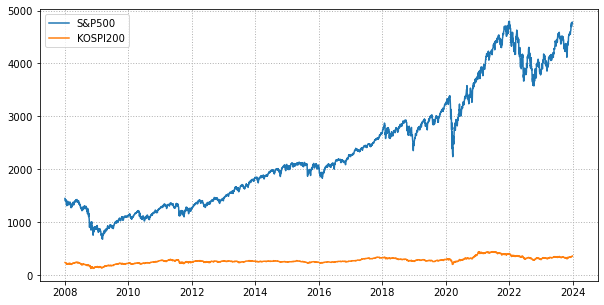

In [129]:
plt.figure(figsize=(10,5)) #크기 조절
plt.plot(df['S&P500'],label='S&P500') #데이터 선택
plt.plot(df['KOSPI200'],label='KOSPI200')
plt.legend(loc=0) #범례 위치 지정
plt.grid(True, color='0.7', linestyle=':', linewidth=1) #그리드 설정

>이렇듯 S&P500와 KOSPI200을 그래프를 통해서 볼 수 있지만, KOSPI200의 움직임을 잘 볼 수 없기 때문에 지수화 작업을 해준다. 


In [130]:
df.iloc[0] #인덱스(위치)로 지정

S&P500      1447.16
KOSPI200     235.30
Name: 2008-01-02, dtype: float64

In [131]:
df.loc[dt.date(2008,1,2)]

S&P500      1447.16
KOSPI200     235.30
Name: 2008-01-02, dtype: float64

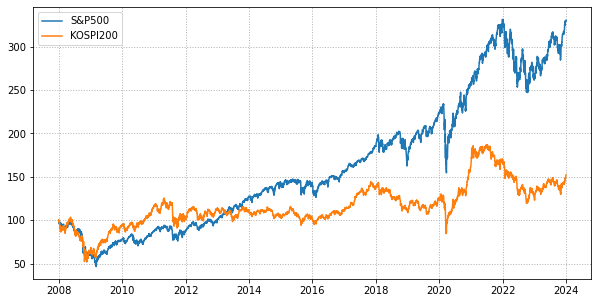

In [132]:
plt.figure(figsize=(10, 5))
plt.plot(df['S&P500'] / df['S&P500'].loc[dt.date(2008, 1, 2)] * 100, label='S&P500')
plt.plot(df['KOSPI200'] / df['KOSPI200'].loc[dt.date(2008, 1, 2)] * 100, label='KOSPI200')
plt.legend(loc=0)
plt.grid(True, color='0.7', linestyle=':', linewidth=1)

> Kospi200의 움직임이 한눈에 들어온다. 이번에는 특정 날짜 2016년 1월 1일부터의 움직임만을 추려서 보기 위해서 데이터를 지수화 시커 df_ratio_2016년 1월 1일 부터의 움직임만을 추려서 그래프를 그려본다. 

In [133]:
df_ratio_2016_now = df.loc[dt.date(2016,1,1):] / df.loc[dt.date(2016,1,4)]*100
df_ratio_2016_now.head(3)

,S&P500,KOSPI200
2016-01-04,100.000000,100.000000
2016-01-05,100.201226,100.639304
2016-01-06,98.887045,99.987214


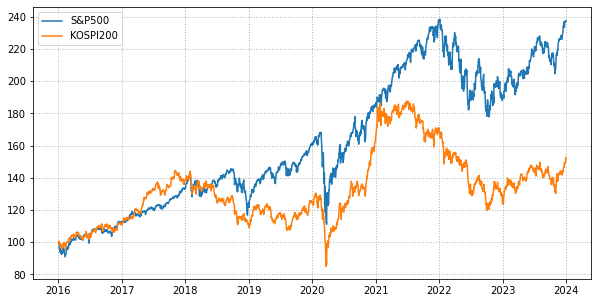

In [135]:
plt.figure(figsize=(10,5))
plt.plot(df_ratio_2016_now['S&P500'],label='S&P500')
plt.plot(df_ratio_2016_now['KOSPI200'],label='KOSPI200')
plt.legend(loc=0)
plt.grid(True, color='0.7',linestyle=':',linewidth=1)

## 회귀분석

#### 회귀분석을 이용해서 두 지수의 상관관계를 분석하기 위해서 두 지수를 가지고 산포도(scattered plot)을 그려본다

In [138]:
#2023년 1월 1일부터 지수화 시켜서 상관관계를 알아본다
df_ratio_2023_now = df.loc[dt.date(2023,1,1):]/df.loc[dt.date(2023,1, 3)]*100
df_ratio_2023_now.head(3)

,S&P500,KOSPI200
2023-01-02,100.401659,100.072519
2023-01-03,100.000000,100.000000
2023-01-04,100.753895,102.210097


Text(0, 0.5, 'KOSPI200')

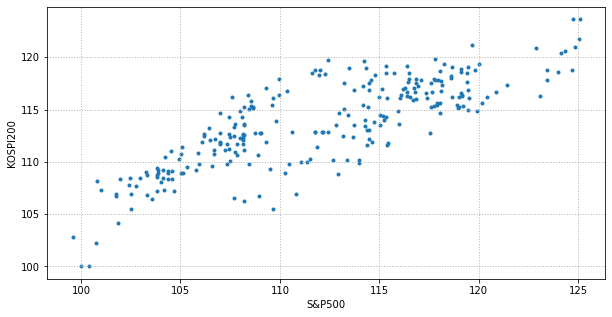

In [143]:
plt.figure(figsize=(10,5))
plt.scatter(df_ratio_2023_now['S&P500'], df_ratio_2023_now['KOSPI200'], marker='.')
plt.grid(True, color='0.7',linestyle=':', linewidth=1)
plt.xlabel('S&P500')
plt.ylabel('KOSPI200')

### 회귀분석을 위해서 sklearn.linear_model 내의 LinearRegression 라이브러리를 사용한다.<br> 벡터화된 데이터 처리를 위해서 *넘파이*(Numpy)라는 모듈도 함께 사용하다. 
<hr>
1. numpy와 LinearRegression 라이브러리를 호출한다.<br>
2. S&P500 지수가 KOSPI200에 미피는 영향을 보기 위해서 x값인 독립변수(independent variable)에는 S&P500 지수를,<br> Y값인 종속변수에는 (dependent vvariable)에는 KOSPI200 지수를 넣는다. <br>
3. LinearRegression 모듈은 n행 1열 벡터를 입력받기 때문에 지수 데이터를 (n,1) 모양으로 변경한다. Array.reshape(-1,1)로 백터 형태를 바꿀 수 있다. <br>
4. LinearRegression의 fit 명령어로 회귀분석을 시행한다. <br>
5. 회귀분석 결괏값인 기울기는 'Slope', Y절편은 'Intercept', R^2 값은 'R^2'라는 키에 저장한 딕셔너리를 반환한다. 

In [142]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = df_ratio_2023_now['S&P500']
y = df_ratio_2023_now['KOSPI200']

#1개 칼럼 np.array로 변환
independent_var = np.array(x).reshape(-1,1)
dependent_var = np.array(y).reshape(-1,1)

#Linear Regression
regr = LinearRegression()
regr.fit(independent_var,dependent_var)

result = {'Slope':regr.coef_[0,0],'Intercept':regr.intercept_[0],'R^2':regr.score(independent_var, dependent_var)}
result

{'Slope': 0.5652898127301442,
 'Intercept': 50.362962632985855,
 'R^2': 0.6655648939199486}

> 위의 결과를 보자면, 2023년 1월 1일의 지점으로 한 주가지수 KOSPI200와 S&P500의 상관관계 결정계수는 0.665으로 나왔다. <br>
기울기: 0.565 y절편: 50.36 R^2: 0.665

### 추세선을 그래프에 나타내기

Text(0.5, 1.0, 'KOSPI200 and S&P500')

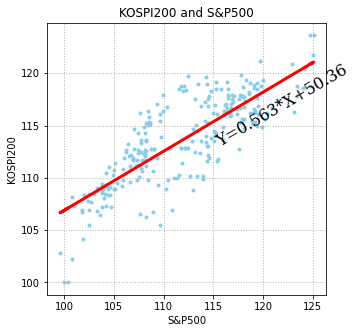

In [176]:
plt.figure(figsize=(5,5))
plt.scatter(independent_var, dependent_var, marker='.',color='skyblue')
plt.plot(independent_var,regr.predict(independent_var),color='red',linewidth=3)
plt.grid(True, color='0.7',linestyle=':',linewidth=1)
plt.xlabel('S&P500')
plt.ylabel('KOSPI200')
font1 = {'family': 'serif',
      'color':  'Black',
      'weight': 'normal',
      'size': 16}
plt.text(115,113,'Y=0.563*X+50.36',fontdict=font1, rotation=30)
plt.title('KOSPI200 and S&P500')